In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_files

from sklearn.metrics import plot_confusion_matrix

%matplotlib inline
from jupyterthemes import jtplot
jtplot.style('gruvboxd')

In [2]:
SEED = np.random.default_rng(seed = 2021)

In [3]:
lst = ['data/dataset/train/letter.scale.tr', 'data/dataset/test/letter.scale.t', 'data/dataset/valid/letter.scale.val']
lst = [os.path.join(os.getcwd().replace('notebooks', ''), DIR) for DIR in lst]

In [4]:
X_train, y_train, X_test, y_test, X_val, y_val = load_svmlight_files(lst)

In [5]:
### Convert sparse to dense matrices to DataFrames
X_train = pd.DataFrame(X_train.todense())
X_test = pd.DataFrame(X_test.todense())
X_val = pd.DataFrame(X_val.todense())

In [6]:
X_train.shape

(10500, 16)

In [7]:
X_test.shape

(5000, 16)

In [8]:
X_val.shape

(4500, 16)

In [9]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.466667,-0.066667,-0.466667,-0.333333,-0.733333,-0.600000,0.600000,-0.466667,-0.600000,0.466667,0.466667,-0.066667,-0.6,0.333333,-0.866667,-0.066667
1,-0.733333,-0.466667,-0.466667,-0.600000,-0.866667,-0.200000,-0.466667,-0.866667,0.066667,0.066667,-0.733333,0.333333,-1.0,-0.066667,-0.733333,0.066667
2,-0.733333,0.200000,-0.600000,-0.066667,-0.733333,0.200000,-0.066667,-1.000000,-0.066667,0.733333,-0.333333,0.066667,-1.0,0.066667,-0.866667,0.066667
3,-0.733333,-0.866667,-0.733333,-0.733333,-0.866667,-0.200000,-0.066667,-0.200000,0.333333,-0.066667,-0.200000,0.866667,-1.0,0.066667,-0.466667,0.200000
4,-0.333333,0.200000,-0.333333,-0.066667,-0.600000,-0.466667,0.466667,-0.733333,-0.466667,0.200000,0.466667,-0.066667,-0.6,0.333333,-0.866667,0.066667


In [10]:
X_train.isnull().sum().sum()

0

In [11]:
X_test.isnull().sum().sum()

0

In [12]:
X_val.isnull().sum().sum()

0

In [13]:
X_train.skew()

0     0.740112
1    -0.218836
2     0.267833
3    -0.279271
4     0.944585
5    -0.335454
6     0.065484
7     1.142711
8     0.326001
9     0.068663
10    0.286820
11    0.272599
12    1.061922
13    0.088255
14    0.462731
15   -0.241175
dtype: float64

In [14]:
X_train.kurt()

0     0.993450
1    -0.426221
2     0.418199
3    -0.231945
4     1.206377
5     1.525302
6     0.989658
7     2.025485
8     0.377063
9     0.385602
10    0.351663
11    0.981600
12    1.308525
13    0.818095
14   -0.324123
15    1.155996
dtype: float64

In [15]:
corr_data = X_train.corr('kendall')

In [16]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,-0.461321,-0.059657,-0.315111,-0.282235,-0.531010,-0.080406,1.847619e-09,-0.380952,-0.312279,0.101892,-0.138667,0.058324,-0.590375,0.113448,-0.511594,0.037460
std,0.257005,0.442714,0.269644,0.302206,0.294384,0.271507,3.128203e-01,0.362075,0.318116,0.332856,0.351712,0.278141,0.313297,0.207066,0.340915,0.217043
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-0.866667,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.600000,-0.333333,-0.466667,-0.466667,-0.733333,-0.200000,-2.000000e-01,-0.600000,-0.466667,-0.066667,-0.333333,-0.066667,-0.866667,0.066667,-0.733333,-0.066667
50%,-0.466667,-0.066667,-0.333333,-0.200000,-0.600000,-0.066667,-6.666670e-02,-0.466667,-0.333333,0.066667,-0.200000,0.066667,-0.600000,0.066667,-0.600000,0.066667
75%,-0.333333,0.200000,-0.200000,-0.066667,-0.333333,0.066667,2.000000e-01,-0.200000,-0.066667,0.333333,0.066667,0.200000,-0.466667,0.200000,-0.333333,0.066667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


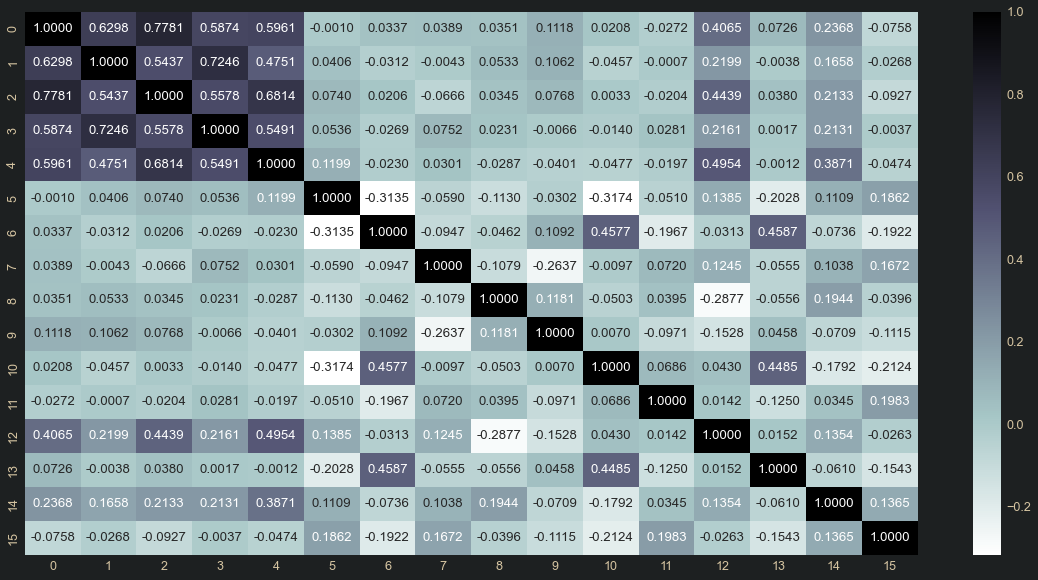

In [17]:
plt.figure(figsize = (20, 10))
sns.heatmap(corr_data, annot = True, fmt = '.4f', cmap = 'bone_r')
plt.show()
plt.close()

In [18]:
np.unique(y_train)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

C:\Users\PROBOOK\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


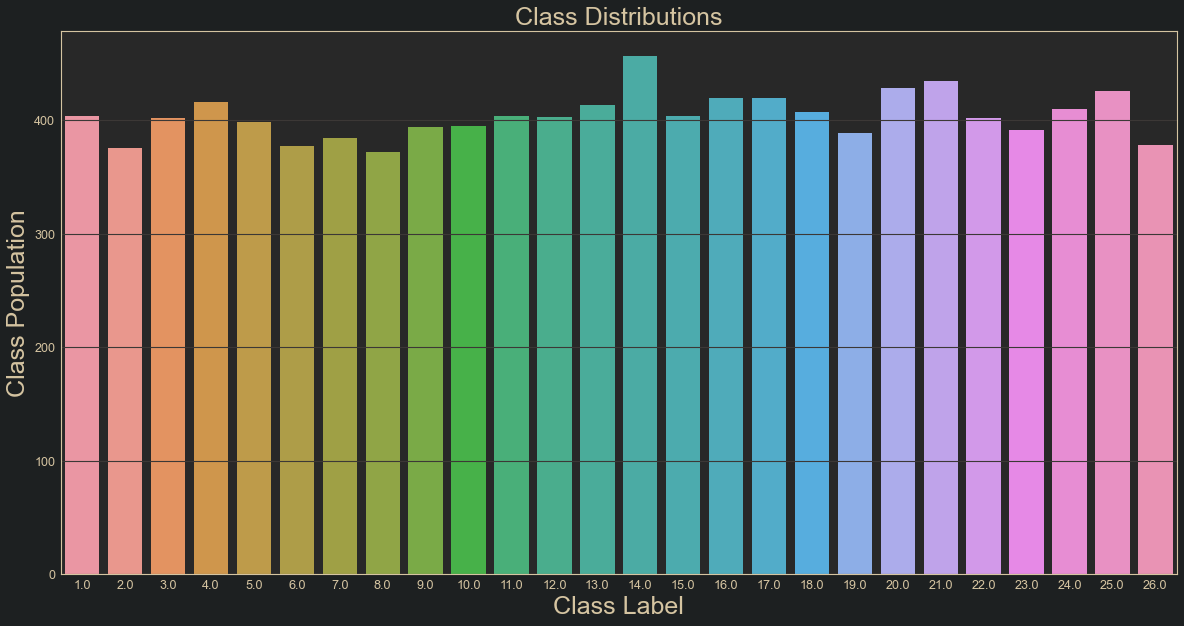

In [19]:
plt.figure(figsize = (20, 10))
sns.countplot(y_train)
plt.title('Class Distributions', fontsize = 25)
plt.xlabel('Class Label', fontsize = 25)
plt.ylabel('Class Population', fontsize = 25)
plt.show()
plt.close()

In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, f1_score

In [21]:
svc = SVC(C = 2.0, shrinking = False)
lr = LogisticRegression(penalty = 'elasticnet', solver = 'saga', n_jobs = -1, l1_ratio = 0.3)
sgd = SGDClassifier(loss = 'perceptron', learning_rate = 'adaptive', n_jobs = -1, eta0 = 0.0002)

FEATURE SELECTION

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [23]:
feature_selector = SelectKBest(score_func = mutual_info_classif, k = 12)

In [24]:
feature_selector.fit(X_train, y_train)

SelectKBest(k=12,
            score_func=<function mutual_info_classif at 0x000001EF82DA4CA0>)

X_train = feature_selector.transform(X_train)
X_test = feature_selector.transform(X_test)
X_val = feature_selector.transform(X_val)

SUPPORT VECTOR MACHINE CLASSIFIER

In [25]:
svc.fit(X_train, y_train)

SVC(C=2.0, shrinking=False)

In [26]:
print(classification_report(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99       404
         2.0       0.85      0.94      0.89       375
         3.0       0.98      0.93      0.96       402
         4.0       0.89      0.95      0.92       416
         5.0       0.90      0.93      0.92       398
         6.0       0.93      0.94      0.93       377
         7.0       0.87      0.95      0.91       384
         8.0       0.92      0.81      0.86       372
         9.0       0.98      0.94      0.96       394
        10.0       0.95      0.96      0.95       395
        11.0       0.93      0.93      0.93       404
        12.0       1.00      0.92      0.96       403
        13.0       0.95      0.98      0.97       413
        14.0       0.96      0.95      0.95       456
        15.0       0.93      0.95      0.94       404
        16.0       0.99      0.90      0.94       419
        17.0       0.96      0.97      0.96       419
        18.0       0.86    

In [27]:
print(classification_report(y_val, svc.predict(X_val)))

              precision    recall  f1-score   support

         1.0       0.99      0.97      0.98       190
         2.0       0.83      0.96      0.89       192
         3.0       0.97      0.93      0.95       152
         4.0       0.87      0.92      0.89       182
         5.0       0.86      0.93      0.89       167
         6.0       0.88      0.88      0.88       188
         7.0       0.83      0.91      0.87       163
         8.0       0.89      0.79      0.84       166
         9.0       0.98      0.89      0.93       173
        10.0       0.93      0.97      0.95       180
        11.0       0.93      0.93      0.93       168
        12.0       0.99      0.91      0.95       157
        13.0       0.95      0.94      0.95       194
        14.0       0.91      0.93      0.92       149
        15.0       0.88      0.94      0.91       170
        16.0       0.95      0.89      0.92       178
        17.0       0.95      0.93      0.94       175
        18.0       0.79    

In [28]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       195
         2.0       0.86      0.94      0.90       199
         3.0       0.95      0.93      0.94       182
         4.0       0.88      0.98      0.93       207
         5.0       0.87      0.93      0.90       203
         6.0       0.90      0.93      0.92       210
         7.0       0.86      0.90      0.88       226
         8.0       0.92      0.87      0.89       196
         9.0       0.97      0.91      0.94       188
        10.0       0.91      0.93      0.92       172
        11.0       0.94      0.89      0.91       167
        12.0       0.99      0.94      0.96       201
        13.0       0.91      0.96      0.93       185
        14.0       0.97      0.95      0.96       178
        15.0       0.91      0.91      0.91       179
        16.0       0.99      0.88      0.93       206
        17.0       0.93      0.96      0.95       189
        18.0       0.84    

LOGISTIC REGRESSION

In [29]:
lr.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.3, n_jobs=-1, penalty='elasticnet', solver='saga')

In [30]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

         1.0       0.86      0.88      0.87       404
         2.0       0.65      0.76      0.70       375
         3.0       0.80      0.77      0.78       402
         4.0       0.72      0.81      0.77       416
         5.0       0.75      0.78      0.77       398
         6.0       0.77      0.76      0.77       377
         7.0       0.61      0.48      0.54       384
         8.0       0.55      0.44      0.49       372
         9.0       0.87      0.83      0.85       394
        10.0       0.87      0.77      0.82       395
        11.0       0.67      0.73      0.70       404
        12.0       0.84      0.78      0.81       403
        13.0       0.86      0.90      0.88       413
        14.0       0.84      0.84      0.84       456
        15.0       0.68      0.68      0.68       404
        16.0       0.87      0.81      0.84       419
        17.0       0.72      0.75      0.73       419
        18.0       0.73    

In [31]:
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

         1.0       0.88      0.85      0.86       190
         2.0       0.66      0.79      0.72       192
         3.0       0.76      0.74      0.75       152
         4.0       0.73      0.85      0.79       182
         5.0       0.70      0.80      0.75       167
         6.0       0.80      0.69      0.74       188
         7.0       0.58      0.48      0.53       163
         8.0       0.53      0.42      0.46       166
         9.0       0.89      0.83      0.86       173
        10.0       0.88      0.84      0.86       180
        11.0       0.66      0.67      0.66       168
        12.0       0.86      0.77      0.81       157
        13.0       0.91      0.90      0.90       194
        14.0       0.87      0.88      0.87       149
        15.0       0.69      0.64      0.67       170
        16.0       0.82      0.83      0.82       178
        17.0       0.72      0.73      0.72       175
        18.0       0.65    

In [32]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.87      0.89      0.88       195
         2.0       0.70      0.76      0.73       199
         3.0       0.74      0.77      0.75       182
         4.0       0.74      0.85      0.79       207
         5.0       0.72      0.82      0.77       203
         6.0       0.82      0.73      0.77       210
         7.0       0.65      0.46      0.54       226
         8.0       0.53      0.43      0.47       196
         9.0       0.89      0.81      0.85       188
        10.0       0.82      0.82      0.82       172
        11.0       0.62      0.68      0.65       167
        12.0       0.89      0.82      0.85       201
        13.0       0.89      0.91      0.90       185
        14.0       0.81      0.83      0.82       178
        15.0       0.65      0.57      0.61       179
        16.0       0.89      0.82      0.86       206
        17.0       0.71      0.77      0.74       189
        18.0       0.66    

STOCHASTIC GRADIENT DESCENT CLASSIFIER

In [33]:
sgd.fit(X_train, y_train)

SGDClassifier(eta0=0.0002, learning_rate='adaptive', loss='perceptron',
              n_jobs=-1)

In [34]:
print(classification_report(y_train, sgd.predict(X_train)))

              precision    recall  f1-score   support

         1.0       0.91      0.84      0.88       404
         2.0       0.00      0.00      0.00       375
         3.0       0.52      0.71      0.60       402
         4.0       0.73      0.58      0.65       416
         5.0       0.50      0.29      0.37       398
         6.0       0.80      0.02      0.04       377
         7.0       0.15      0.35      0.21       384
         8.0       0.11      0.47      0.18       372
         9.0       0.80      0.72      0.76       394
        10.0       0.92      0.65      0.76       395
        11.0       0.49      0.21      0.29       404
        12.0       0.82      0.73      0.77       403
        13.0       0.91      0.87      0.89       413
        14.0       0.79      0.60      0.68       456
        15.0       0.16      0.29      0.20       404
        16.0       0.83      0.76      0.80       419
        17.0       0.89      0.02      0.04       419
        18.0       0.39    

In [35]:
print(classification_report(y_val, sgd.predict(X_val)))

              precision    recall  f1-score   support

         1.0       0.92      0.83      0.88       190
         2.0       0.29      0.01      0.02       192
         3.0       0.51      0.75      0.61       152
         4.0       0.72      0.57      0.63       182
         5.0       0.42      0.28      0.34       167
         6.0       0.71      0.03      0.05       188
         7.0       0.17      0.40      0.24       163
         8.0       0.12      0.53      0.20       166
         9.0       0.82      0.74      0.78       173
        10.0       0.90      0.66      0.76       180
        11.0       0.60      0.24      0.35       168
        12.0       0.78      0.73      0.75       157
        13.0       0.94      0.87      0.91       194
        14.0       0.72      0.65      0.69       149
        15.0       0.16      0.26      0.20       170
        16.0       0.78      0.78      0.78       178
        17.0       0.40      0.01      0.02       175
        18.0       0.35    

In [36]:
print(classification_report(y_test, sgd.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.91      0.85      0.88       195
         2.0       0.25      0.01      0.01       199
         3.0       0.48      0.73      0.58       182
         4.0       0.71      0.55      0.62       207
         5.0       0.55      0.38      0.45       203
         6.0       0.57      0.02      0.04       210
         7.0       0.19      0.35      0.25       226
         8.0       0.12      0.47      0.19       196
         9.0       0.79      0.69      0.73       188
        10.0       0.87      0.67      0.76       172
        11.0       0.50      0.25      0.33       167
        12.0       0.82      0.73      0.77       201
        13.0       0.96      0.87      0.91       185
        14.0       0.71      0.63      0.67       178
        15.0       0.15      0.27      0.19       179
        16.0       0.83      0.74      0.78       206
        17.0       1.00      0.03      0.06       189
        18.0       0.36    

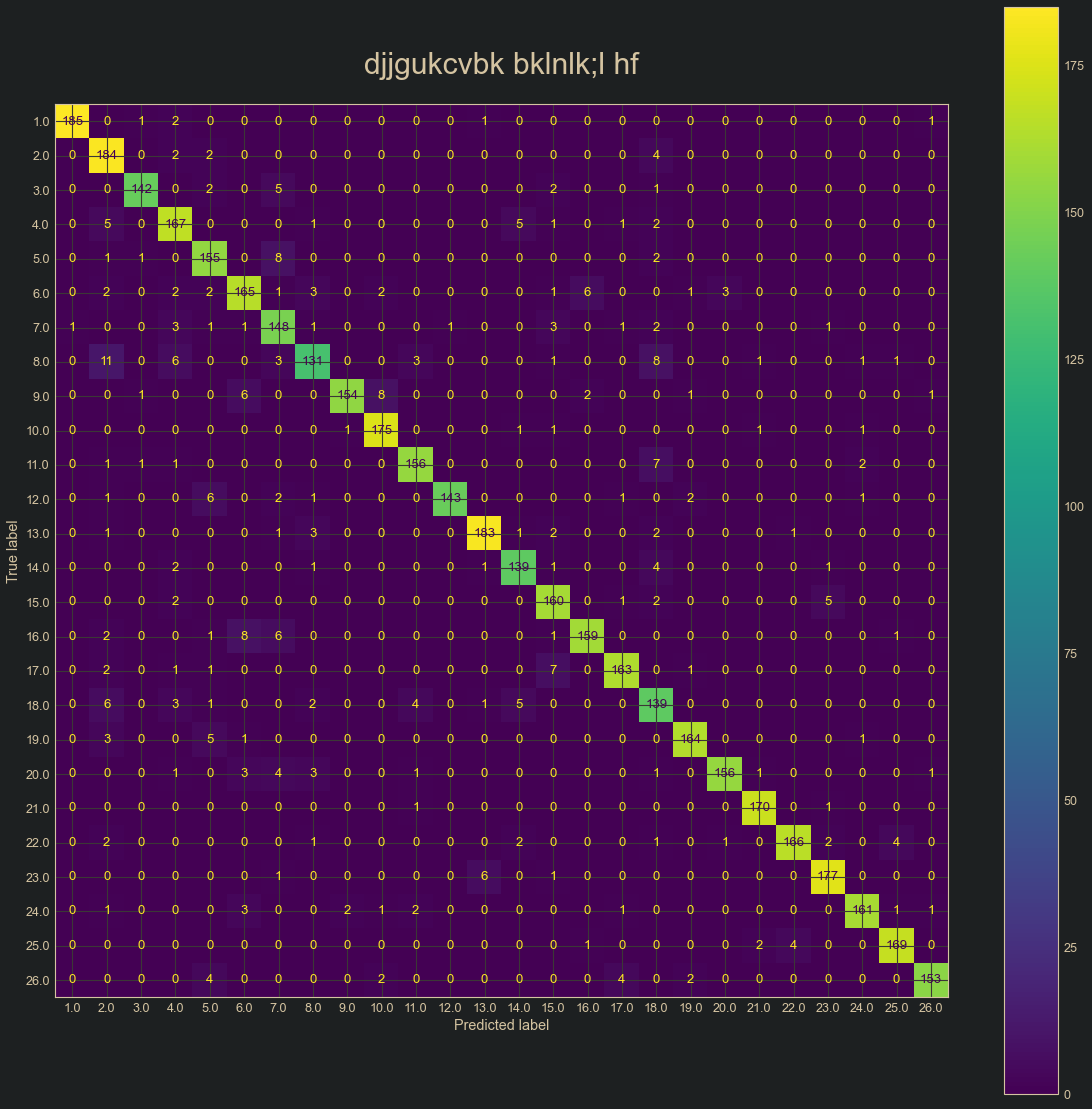

In [37]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 20))
plt.title('djjgukcvbk bklnlk;l hf', fontsize = 30, pad = 30)
plot_confusion_matrix(svc, X_val, y_val, ax = ax)
plt.show()
plt.close('all')